# 정적 지도

---

&emsp;앞선 단원들에서 [`geopandas.GeoDataFrame.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html)을 사용하여 간단한 정적 지도(static map)를 그리는 방법에 대해 익혔습니다. 이번 단원에서는 앞서 배운 내용들을 활용하여 좀더 복잡한 정적 지도를 그려보겠습니다. 이 지도에는 노숙자 인구, 도로, 지하철 노선이 표시되며, 세 개의 레이어가 겹쳐져 표현됩니다.

## 데이터

&emsp;여러분은 세 가지의 다른 데이터셋을 사용할 것입니다. 아래의 데이터는 [County of Los Angeles Enterprise GIS](https://egis-lacounty.hub.arcgis.com/)에서 다운로드 받을 수 있습니다.

* 로스앤젤레스 구역별 노숙자 인구
* 로스앤젤레스 지하철 노선
* 로스앤젤레스의 주요 도로

### 노숙자 인구 데이터

In [1]:
import pathlib
import geopandas as gpd
# 데이터 경로
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
# 노숙자 인구 데이터
homeless_grid = gpd.read_file(DATA_DIRECTORY / "Homeless_Counts_2020.geojson")
homeless_grid.head()

,OBJECTID,CSA_Label,Total_Unsheltered_Pop,Total_Sheltered_Pop,Total_Pop,Data_Source,Square_Miles,Density_Unsheltered,Density_Sheltered,Density_Total,Shape__Area,Shape__Length,geometry
0,1,City of Agoura Hills,2,0,2,Los Angeles Homeless Services Authority (LAHSA),5.427723,0.368479,0.000000,0.368479,2.058150e+07,21914.080903,"POLYGON ((-118.74008 34.16798, -118.73567 34.1..."
1,2,City of Alhambra,32,14,46,Los Angeles Homeless Services Authority (LAHSA),7.630029,4.193955,1.834855,6.028811,2.888244e+07,25368.896059,"POLYGON ((-118.12182 34.10507, -118.12174 34.1..."
2,3,City of Arcadia,68,0,68,Los Angeles Homeless Services Authority (LAHSA),10.240411,6.640358,0.000000,6.640358,3.881236e+07,35209.966257,"POLYGON ((-118.01826 34.17572, -118.01843 34.1..."
3,4,City of Artesia,24,0,24,Los Angeles Homeless Services Authority (LAHSA),1.620773,14.807752,0.000000,14.807752,6.103736e+06,15015.336550,"POLYGON ((-118.07491 33.88039, -118.07485 33.8..."
4,5,City of Avalon,28,3,31,Los Angeles Homeless Services Authority (LAHSA),1.233833,22.693504,2.431447,25.124951,4.589095e+06,12492.086289,"POLYGON ((-118.33051 33.35552, -118.33047 33.3..."


### 지하철 노선

In [2]:
# 지하철 노선
metro = gpd.read_file(DATA_DIRECTORY / "MTA_Metro_Lines.geojson")
metro

,OBJECTID,NAME,STATUS,TYPE,LABEL,SHAPE_Length,geometry
0,513,Blue Line,Existing,Rail,Metro A Line (Blue),0.332035,"MULTILINESTRING ((-118.18937 33.77684, -118.18..."
1,515,Orange Line,Existing,Bus,Metro G Line (Orange),0.358219,"MULTILINESTRING ((-118.39873 34.16851, -118.39..."
2,524,K Line,Existing,Rail,Metro K Line,0.093875,"MULTILINESTRING ((-118.33509 34.02253, -118.33..."
3,526,K Line,Construction,Rail,Metro K Line,0.034949,"MULTILINESTRING ((-118.37446 33.96202, -118.37..."
4,528,Green Line,Existing,Rail,Metro C Line (Green),0.336354,"MULTILINESTRING ((-118.10112 33.91435, -118.10..."
5,530,Purple Line Ext 1,Construction,Rail,Metro D Line (Purple),0.067698,"MULTILINESTRING ((-118.37703 34.06537, -118.37..."
6,531,Purple Line Ext 2,Construction,Rail,Metro D Line (Purple),0.044267,"MULTILINESTRING ((-118.37703 34.06537, -118.37..."
7,532,Purple Line Ext 3,Construction,Rail,Metro D Line (Purple),0.043554,"MULTILINESTRING ((-118.41677 34.05807, -118.41..."
8,533,Gold Line,Construction,Rail,Metro L Line (Gold),0.208126,"MULTILINESTRING ((-117.69442 34.09395, -117.72..."
9,534,Regional Connector,Construction,Rail,Regional Connector,0.032172,"MULTILINESTRING ((-118.23812 34.04897, -118.23..."


### 주요 도로

In [3]:
# 주요 도로
roads = gpd.read_file(DATA_DIRECTORY / "Master_Plan_of_Highways.geojson")
roads.head()

,OBJECTID,LENGTH,TYPE,STRU,STAT,SURF,PREF_ALF,NAME_ALF,SUFFABV_AL,DIRSABV_AL,...,TBMCITYL_A,TBMCITYR_A,NUMBER,SYMBOL,HCODE,HCODE_NAME,dbgis_USER2_GP_DRP_HWY_PLAN_29,NO_LANES,ShapeSTLength,geometry
0,22691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PARKWAY - PROPOSED,NaN,NaN,6094.916994,"LINESTRING (-118.33371 33.72602, -118.33429 33..."
1,22692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SECONDARY HIGHWAY - EXISTING,NaN,NaN,24.005160,"LINESTRING (-118.31458 33.78747, -118.31458 33..."
2,22693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LIMITED SECONDARY HIGHWAY - EXISTING,NaN,NaN,68.065228,"LINESTRING (-118.53672 34.76006, -118.53649 34..."
3,22694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MAJOR HIGHWAY - EXISTING,NaN,NaN,5349.044231,"LINESTRING (-117.95205 34.66805, -117.95204 34..."
4,22695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SECONDARY HIGHWAY - EXISTING,NaN,NaN,16045.314884,"LINESTRING (-117.95170 34.61666, -117.95171 34..."


&emsp;서로 다른 GIS 데이터에 대해 `geopandas.GeoDataFrame.plot()`를 사용하여 하나의 지도에 나타내기 전에, 모든 GeoDataFrame이 동일한 좌표계를 갖도록 설정해주어야 합니다.

In [4]:
# 좌표 참조 시스템(CRS)이 동일한지 확인
assert homeless_grid.crs == metro.crs == roads.crs, "Input data sets’ CRS differs"

In [5]:
homeless_grid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 다중레이어 지도 플롯

&emsp;`geopandas.GeoDataFrame.plot()`에 입력할 수 있는 옵션들을 알아두면 도움이 됩니다.

* 다각형(Polygon) 레이어 스타일
  * `scheme` : 분류 체계
  * `cmap` : [색상 맵](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
  * `alpha` : 레이어의 투명도 (0은 완전 투명, 1은 완전 불투명)
 
* 선(Line) 레이어 스타일
  * `color` : 선 색상
  * `linewidth` : 선 두께

&emsp;각각의 레이어가 표현하는 지도 상에서의 범위는 다양할 수 있습니다. 예를 들어, 여기서 사용할 지하철 노선 데이터 `metro`는 로스앤젤레스의 도심 지역만 표현해도 되지만, 도로 `roads`는 훨씬 넓은 영역(도심 외곽)까지 표현해야 할 수 있습니다. 이러한 경우, 축(`ax`)의 메서드인 `set_xlim()`과 `set_ylim()`을 사용하여 지도의 수평, 수직 범위를 설정할 수 있습니다.

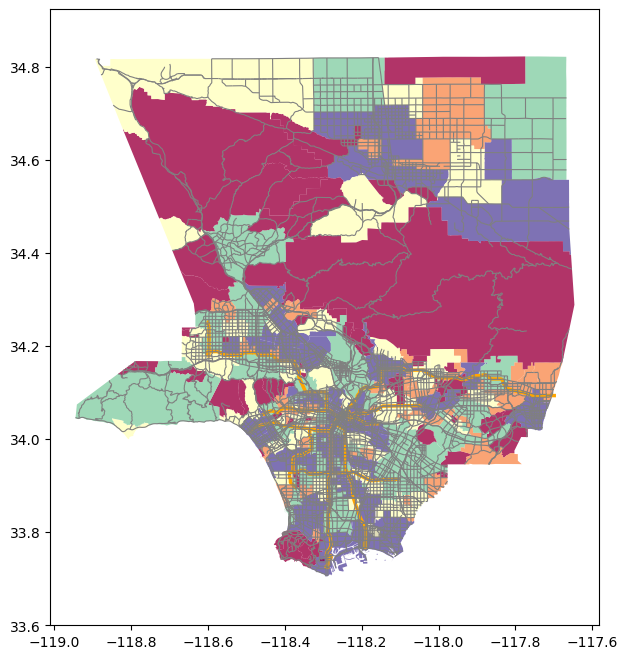

In [6]:
import matplotlib.pyplot as plt
# 노숙자 인구 플롯
ax = homeless_grid.plot(
    figsize=(12, 8),
    
    column="Total_Pop",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8
)
# 지하철 노선 플롯
metro.plot(
    ax=ax,
    color="orange",
    linewidth=2.5
)
# 주요 도로 플롯
roads.plot(
    ax=ax,
    color="grey",
    linewidth=0.8
)
ax.set_ylim(33.6,)
plt.show()

## 범례(Legend) 추가

&emsp;지도에 범례(legend)를 추가하려면 `legend=True` 파라미터를 추가해 줍니다. 분류 체계(`scheme`)가 없는 그림이라면 범례는 그라데이션 막대로 나타납니다. 범례는 [`matplotlib.pyplot.colorbar.Colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)의 인스턴스이며, 범례를 스타일링 하기 위해서는 `legend_kwds`에 인수를 설정하여 다양한 스타일로 꾸밀 수 있습니다. 아래의 예시에서 `label` 인수를 사용하여 *범례 제목*을 설정하겠습니다.

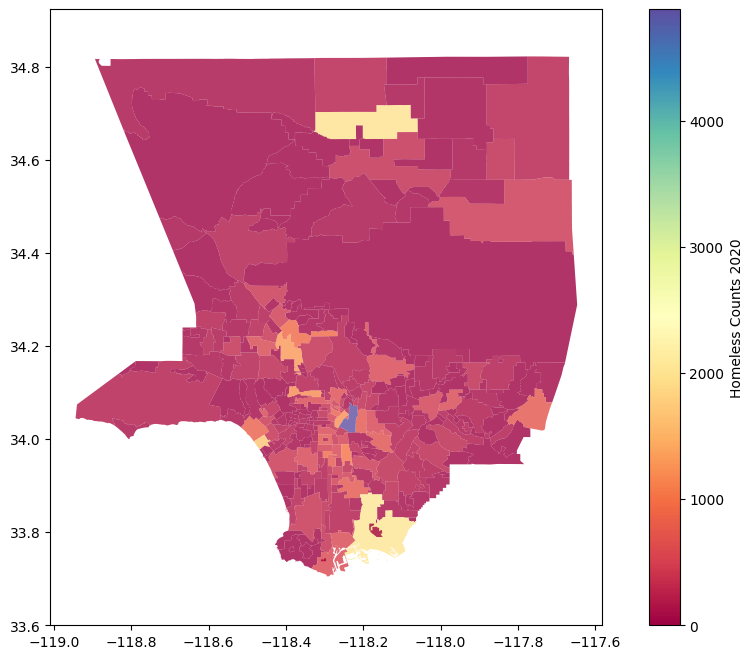

In [7]:
# 연속형 범례 (분류 체계 없음)
ax = homeless_grid.plot(
    figsize=(12, 8),

    column="Total_Pop",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"label": "Homeless Counts 2020"}
)
ax.set_ylim(33.6,)
plt.show()

&emsp;반면에 분류 체계(`scheme`)를 사용하는 그림의 경우, 범례가 [`matplotlib.legend.Legend`](https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend) 인스턴스로 생성됩니다. 범례의 스타일을 설정하기 위해 이번에도 `legend_kwds`가 사용되지만 파라미터는 다를 수 있습니다. 예를 들어, 범례 제목을 설정하려면 `label` 대신 `title`을 사용해야 합니다.

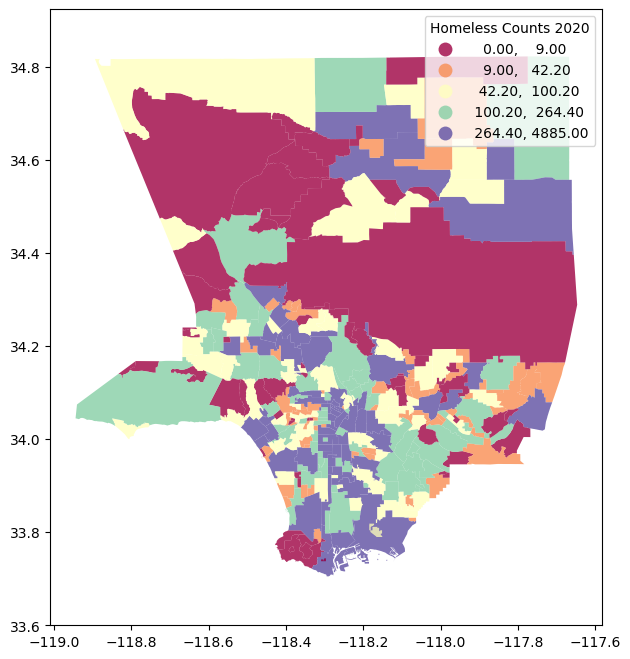

In [8]:
# 분류 체계 있음
ax = homeless_grid.plot(
    figsize=(12, 8),

    column="Total_Pop",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Homeless Counts 2020", "loc": "upper right"}
)
ax.set_ylim(33.6,)
plt.show()

## 배경 지도(Base map) 추가

&emsp;지도를 스타일링 할 때, 그림에 배경 지도(base map)를 추가하는 것이 가시성이나 정보 전달성 측면에서 좋습니다. 예를 들어, [OpenStreetMap](https://www.openstreetmap.org/) 또는 [Stamen](http://maps.stamen.com/)과 같은 지도 제공업체의 지도에는 거리명, 장소명, 기타 상황별 정보 등 다양한 정보들이 추가됩니다. 이러한 지도를 파이썬에서 활용하기 위해 [`contextily`](https://contextily.readthedocs.io/en/latest/)라는 패키지를 사용하며, 이를 통해 필요한 배경 지도 타일을 다운로드하고 geopandas 플롯에 렌더링하여 배경 지도를 추가할 수 있습니다.

```{admonition} 웹 메르카토르(Mercator)
:class: warning
&emsp;온라인 지도 제공업체의 지도는 일반적으로 [Web Mercator 투영법(EPSG:3857)](https://spatialreference.org/ref/sr-org/epsg3857-wgs84-web-mercator-auxiliary-sphere/)입니다. 따라서, 함께 투영할 다른 레이어들도 `EPSG:3857`로 재투영하는 것이 좋습니다.
```

In [9]:
# 참조 좌표 시스템 EPSG:3857로 재투영
homeless_grid = homeless_grid.to_crs("EPSG:3857")
metro = metro.to_crs("EPSG:3857")
roads = roads.to_crs("EPSG:3857")

&emsp;기존 플롯에 배경 지도를 추가하려면 `contextily.add_basemap()` 함수를 사용합니다.

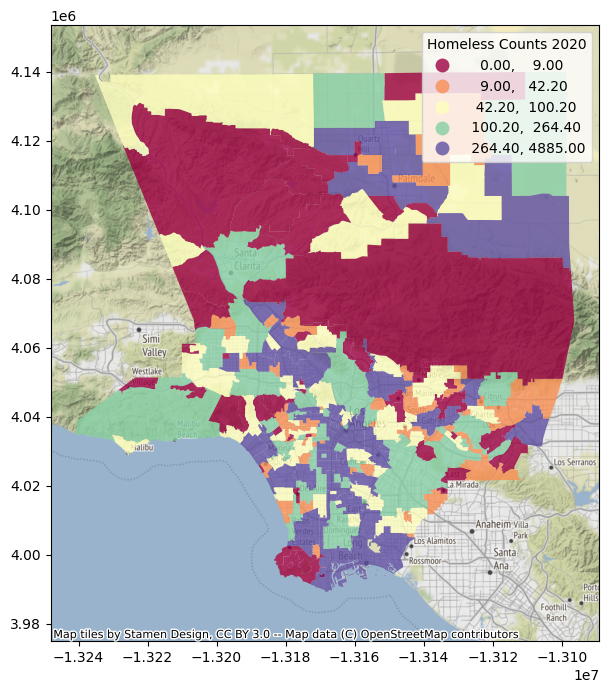

In [10]:
import contextily

ax = homeless_grid.plot(
    figsize=(12, 8),

    column="Total_Pop",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Homeless Counts 2020", "loc": "upper right"}
)
ax.set_ylim(3.975*1e6,)
contextily.add_basemap(ax)
plt.show()

&emsp;기본적으로 *contextily*에서는 [Stamen Terrain](http://maps.stamen.com/#terrain/)을 사용하지만, 이외에 선택할 수 있는 다른 온라인 지도도 많이 있습니다. 다른 [`contextily.providers`](https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers)를 사용하기 위해서는 `add_basemap()`의 `source` 인자를 설정합니다. 예를 들어, OpenStreetMap의 *Mapnik* 스타일을 사용해 보겠습니다.

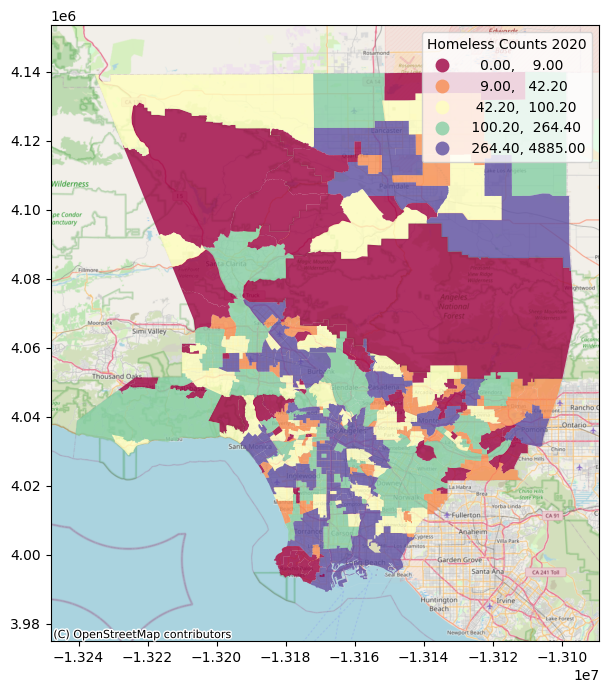

In [11]:
ax = homeless_grid.plot(
    figsize=(12, 8),

    column="Total_Pop",
    scheme="quantiles",
    cmap="Spectral",
    linewidth=0,
    alpha=0.8,

    legend=True,
    legend_kwds={"title": "Homeless Counts 2020", "loc": "upper right"}
)
ax.set_ylim(3.975*1e6,)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik
)
plt.show()

&emsp;이 확대/축소 수준에서는 OpenStreetMap 사용으로 인한 이점(예: 지명)이 최대한 활용되지 않습니다. 축(`ax`)의 범위를 `set_xlim()`, `set_ylim()`을 사용하여 더 확대해서 살펴보겠습니다.

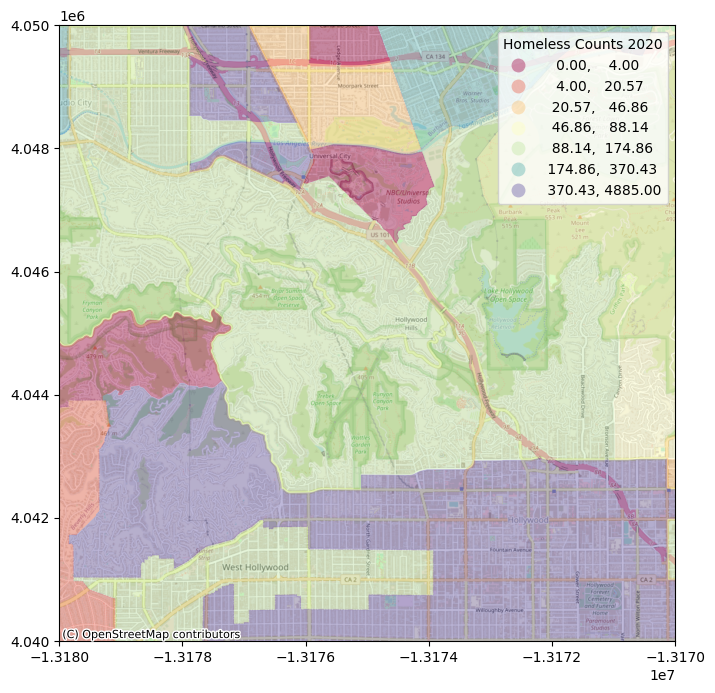

In [12]:
ax = homeless_grid.plot(
    figsize=(12, 8),

    column="Total_Pop",
    scheme="quantiles",
    k=7,
    cmap="Spectral",
    linewidth=0,
    alpha=0.4,

    legend=True,
    legend_kwds={"title": "Homeless Counts 2020", "loc": "upper right"}
)
ax.set_xlim(-1.318*1e7, -1.317*1e7)
ax.set_ylim(4.04*1e6, 4.05*1e6)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik
)
plt.show()

&emsp;마지막으로 지도의 왼쪽 하단에 표시된 저작권 관련 속성을 수정할 수도 있습니다. 지도 제공업체의 이용 약관을 *항상* 준수해야 하며, *contextily* 패키지를 사용할 경우 자동으로 저작권 관련 속성을 지도의 왼쪽 하단에 표시합니다. 하지만 여기에서 사용한 노숙자 인구 데이터처럼 패키지에서 제공하지 않는 모든 레이어에 대한 데이터 출처도 표시해야 합니다.

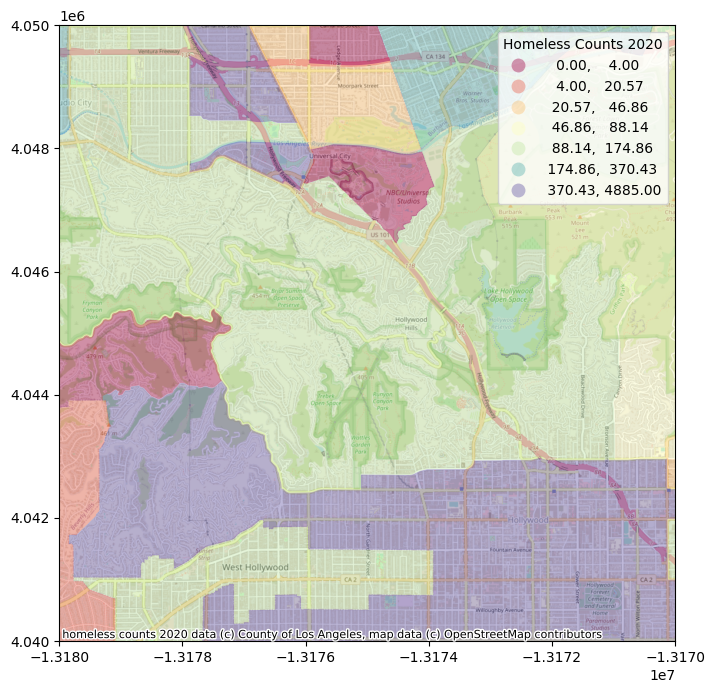

In [16]:
ax = homeless_grid.plot(
    figsize=(12, 8),

    column="Total_Pop",
    scheme="quantiles",
    k=7,
    cmap="Spectral",
    linewidth=0,
    alpha=0.4,

    legend=True,
    legend_kwds={"title": "Homeless Counts 2020", "loc": "upper right"}
)
ax.set_xlim(-1.318*1e7, -1.317*1e7)
ax.set_ylim(4.04*1e6, 4.05*1e6)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik,
    attribution=(
        "homeless counts 2020 data (c) County of Los Angeles, "
        "map data (c) OpenStreetMap contributors"
    )
)
plt.show()

---

```{raw} html
<script src="https://utteranc.es/client.js"
        repo="Kwan-Gu/geospatial_analysis"
        issue-term="pathname"
        theme="preferred-color-scheme"
        crossorigin="anonymous"
        async>
</script>
```